In [1]:
%matplotlib inline
from IPython.display import display
from geoscilabs.em.DipoleWidgetTD import DipoleWidgetTD, InteractiveDipoleProfileTD, InteractiveDipoleDecay
from geoscilabs.em.VolumeWidget import InteractivePlanes, plotObj3D

In [2]:
from matplotlib import rcParams
rcParams['font.size'] = 16

# Magnetic Dipole in a Whole-space (time domain)
## Purpose

By using an analytic solution electromagnetic (EM) fields from electrical dipole in a Whole-space, we present some fundamentals of EM responses in the context of crosswell EM survey. 

#  Set up

For time domain EM method using inductive source, we inject step-off currents to an induction coil, which will generate time varying magnetic field in the earth.  


<img src="https://github.com/geoscixyz/geosci-labs/blob/master/images/em/stepoff_currents.png?raw=true"></img>


## Crosswell EM geometry

Here, we choose geometric parameters for a crosswell EM set-up having two boreholes for Tx and Rx. In the Tx hole, a VED source is located at (0m, 0m, 0m), and it is fixed. Horizontal location of the Rx hole is fixed to 50m apart from the source location in x-direction.  


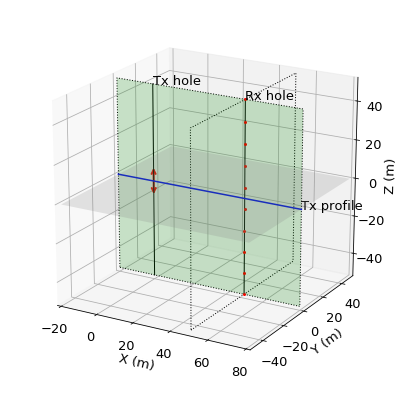

In [3]:
ax = plotObj3D()

## Backgrounds 

When using crosswell electromagnetic (EM) survey, we inject step-off currents to the earth using induction coil, and measure magnetic field at receiver locations in the off-time, when DC effects are disappeared. A common goal here is imaging conductivity structure of the earth by interpreting measured voltages. However, to accomplish that task well, we first need to understand physical behavior of EM responses for the given survey set-up. 

Assuming length of the area of the induction coil is small enough, this can be assumed as magnetic dipole (ED). For a croswell set-up, let we have a vertical magnetic dipole (VMD) source in a homogeneous earth with step-off currents, then we can have analytic solution of EM fields in time domain (WH1988). Solution of of arbitrary EM fields, $\mathbf{f}$, will be a function of 

$$ \mathbf{f} (x, y, z; \sigma, t),$$ 

where $\sigma$ is conductivity of homogenous earth (S/m), and $f$ is transmitting frequency (Hz). Here $\mathbf{f}$ can be electic ($\mathbf{e}$) or magnetic field ($\mathbf{h}$), or current density ($\mathbf{j}$). <strong>Now, you will explore how EM responses behaves as a function of space, $\sigma$, and $t$ for the given crosswell EM set-up  </strong>. 

#  Geometry app

Here, we choose geometric parameters for a crosswell EM set-up having two boreholes for Tx and Rx. In the Tx hole, a VED source is located at (0m, 0m, 0m), and it is fixed. Horizontal location of the Rx hole is fixed to 50m apart from the source location in x-direction.  

## Parameters

- plane: Choose either "XZ" or "YZ" plane
- offset: Offset from a source plane (m)
- nRx: The number of receivers in the Rx hole

Chosen geometric parameters will be used in the Electric Dipole widget below. 

In [4]:
Q0 = InteractivePlanes()
display(Q0)

MyApp(children=(ToggleButtons(description='Plane', options=('XZ', 'YZ'), value='XZ'), FloatSlider(value=0.0, c…

# Magnetic Dipole app

Explore behavior of EM fields, $\mathbf{f} (x, y, z; \sigma, t)$ on 2D plane chosen in the above app. And also at the receiver locations. 


## Parameters:

- Field: Type of EM fields ("E": electric field, "H": magnetic field, "J": current density)
- AmpDir: Type of the vectoral EM fields 

    None: $f_x$ or $f_y$ or $f_z$
    
    Amp: $\mathbf{f} \cdot \mathbf{f} = |\mathbf{f}|^2$
    
    Dir: A vectoral EM fields, $\mathbf{f}$
    
- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- $t$: time after current switch-off 
- $\sigma$: Conductivity of homogeneous earth (S/m)
- Offset: Offset from a source plane
- Scale: Choose "log" or "linear" scale 
- Slider: When it is checked, it activates "flog" and "siglog" sliders above. 
- TimeLog: A float slider for log10 time (only activated when slider is checked) 
- SigLog: A float slider for log10 conductivity (only activated when slider is checked)


In [5]:
dwidget = DipoleWidgetTD()
Q1 = dwidget.InteractiveDipoleBH(nRx=Q0.kwargs["nRx"], plane=Q0.kwargs["Plane"], offset_plane=Q0.kwargs["Offset"], SrcType="MD", fieldvalue="H")
display(Q1)

MyApp(children=(ToggleButtons(description='Field', index=1, options=('E', 'H', 'dHdt', 'J'), value='H'), Toggl…


# Proflie app

Here we focuson data, which can be measured at receiver locations. We limit our attention to three different profile shown in **Geometry** app: Rxhole (red), Txhole (black), TxProfile (blue). 

## Parameters:

- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- ComplexNumber: Type of complex data ("Re", "Im", "Amp", "Phase")
- $t_1$: Time (sec)
- $t_2$: Time (sec)
- $t_3$: Time (sec)
- Profile: Type of profile line ("Rxhole", "Txhole", "TxProfile")
- Scale: Choose "log" or "linear" scale 
- Rx#: choice of Rx point for the following Sounding app

In [6]:
Q2 = InteractiveDipoleProfileTD(dwidget, Q1.kwargs["Sigma"], Q1.kwargs["Field"], Q1.kwargs["Component"], Q1.kwargs["Scale"])
display(Q2)

MyApp(children=(ToggleButtons(description='Comp.', index=2, options=('x', 'y', 'z'), value='z'), ToggleButtons…

# Sounding app

## Parameters:

- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- $\sigma$: Conductivity of homogeneous earth (S/m)
- Scale: Choose "log" or "linear" scale 

In [7]:
app = InteractiveDipoleDecay(dwidget, dwidget.dataview.xyz_line[Q2.kwargs["irx"],:], Q1.kwargs["Field"], Q1.kwargs["Component"])
display(app)

MyApp(children=(ToggleButtons(description='Comp.', index=2, options=('x', 'y', 'z'), value='z'), FloatText(val…